In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
sns.set_theme(color_codes=True)
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('C:/Users/diepr/Documents/maestria/Data Analytics II/Proyecto final/dataset.xlsx')
df3 = pd.read_excel('C:/Users/diepr/Documents/maestria/Data Analytics II/Proyecto final/dataset2.xlsx')

In [3]:
df

ID  NPS 2011  NPS 2010  NPS 2009  NPS 2008 >= 3 FPP Date  \
0        1      10.0      10.0      10.0      10.0    2010-06-06   
1        2       9.0      10.0      10.0       NaN    2009-12-15   
2        3       NaN      10.0      10.0       NaN    2010-06-09   
3        4      10.0       NaN      10.0       NaN    2011-01-06   
4        5      10.0       NaN      10.0       NaN    2010-05-13   
...    ...       ...       ...       ...       ...           ...   
2384  2385       9.0      10.0       9.0       9.0    2010-12-05   
2385  2386      10.0      10.0      10.0       NaN    2010-06-20   
2386  2387      10.0       NaN       NaN       NaN    2011-03-14   
2387  2389      10.0       9.0       8.0       NaN    2010-09-26   
2388  2388       5.0       NaN       NaN       NaN    2010-09-27   

     >= 10 FPP Date >= 20 FPP Date >= 35 FPP Date  
0        2010-06-18     2010-08-17     2010-08-30  
1        2010-01-20     2010-05-31            NaT  
2        2010-06-09     2010-10-26            NaT  
3        2011-01-06            NaT            NaT  
4        2010-05-24     2010-05-27     2010-06-01  
...             ...            ...            ...  
2384     2010-12-13     2010-12-15     2011-04-28  
2385     2010-10-12     2010-11-09            NaT  
2386     2011-03-14     2011-03-15            NaT  
2387     2010-10-04     2010-10-08            NaT  
2388     2010-12-17            NaT            NaT  

[2389 rows x 9 columns]

In [4]:
df3

ID Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  \
0        1           HS         4.0       4.0          CA               0   
1        2           HC         8.0       8.0          AZ               0   
2        3           HD         8.0       8.0          FL               0   
3        4           HN         9.0      12.0          VA               1   
4        5           HD         6.0       8.0          FL               0   
...    ...          ...         ...       ...         ...             ...   
2384  2385           HC         7.0       8.0          CA               0   
2385  2386           HD         8.0       8.0          CA               0   
2386  2387           HD        10.0      12.0          CA               0   
2387  2388           HS         4.0       4.0          CA               0   
2388  2389           HD         8.0       8.0          WA               0   

      Days Travel.Type Departure.Date Return.Date  ... GroupGradeTypeLow  \
0        1           A     2011-01-14  2011-01-14  ...                 K   
1        7           A     2011-01-14  2011-01-21  ...            Middle   
2        3           A     2011-01-15  2011-01-17  ...            Middle   
3        3           B     2011-01-15  2011-01-17  ...         Undefined   
4        6           T     2011-01-16  2011-01-21  ...            Middle   
...    ...         ...            ...         ...  ...               ...   
2384     5           A     2011-06-28  2011-07-02  ...            Middle   
2385     5           A     2011-06-29  2011-07-03  ...                 K   
2386     6           A     2011-06-29  2011-07-05  ...         Undefined   
2387     1           A     2011-06-30  2011-06-30  ...         Undefined   
2388     6           A     2011-06-30  2011-07-05  ...            Middle   

     GroupGradeTypeHigh        GroupGradeType  MajorProgramCode  \
0            Elementary         K->Elementary                 H   
1                Middle        Middle->Middle                 H   
2                Middle        Middle->Middle                 H   
3             Undefined  Undefined->Undefined                 H   
4                Middle        Middle->Middle                 H   
...                 ...                   ...               ...   
2384             Middle        Middle->Middle                 H   
2385             Middle             K->Middle                 H   
2386          Undefined  Undefined->Undefined                 H   
2387          Undefined  Undefined->Undefined                 H   
2388             Middle        Middle->Middle                 H   

      SingleGradeTripFlag  FPP.to.School.enrollment FPP.to.PAX  \
0                       1                  0.063646   0.936508   
1                       1                  0.025882   0.880000   
2                       1                  0.025131   0.888889   
3                       0                       NaN   1.000000   
4                       0                  0.112500   0.910112   
...                   ...                       ...        ...   
2384                    0                  0.018980   0.921053   
2385                    1                  0.034783   0.909091   
2386                    0                       NaN   0.882353   
2387                    1                       NaN   0.941176   
2388                    1                  0.027711   0.884615   

     Num.of.Non_FPP.PAX  SchoolSizeIndicator  Retained.in.2012.  
0                     4                    L                  1  
1                     3                    L                  1  
2                     3                    L                  1  
3                     0                  NaN                  0  
4                     8                  M-L                  0  
...                 ...                  ...                ...  
2384                  3                    L                  0  
2385                  2                  S-M

In [5]:
merged_df = df.merge(df3, on='ID', how='inner')
merged_df

ID  NPS 2011  NPS 2010  NPS 2009  NPS 2008 >= 3 FPP Date  \
0        1      10.0      10.0      10.0      10.0    2010-06-06   
1        2       9.0      10.0      10.0       NaN    2009-12-15   
2        3       NaN      10.0      10.0       NaN    2010-06-09   
3        4      10.0       NaN      10.0       NaN    2011-01-06   
4        5      10.0       NaN      10.0       NaN    2010-05-13   
...    ...       ...       ...       ...       ...           ...   
2384  2385       9.0      10.0       9.0       9.0    2010-12-05   
2385  2386      10.0      10.0      10.0       NaN    2010-06-20   
2386  2387      10.0       NaN       NaN       NaN    2011-03-14   
2387  2389      10.0       9.0       8.0       NaN    2010-09-26   
2388  2388       5.0       NaN       NaN       NaN    2010-09-27   

     >= 10 FPP Date >= 20 FPP Date >= 35 FPP Date Program.Code  ...  \
0        2010-06-18     2010-08-17     2010-08-30           HS  ...   
1        2010-01-20     2010-05-31            NaT           HC  ...   
2        2010-06-09     2010-10-26            NaT           HD  ...   
3        2011-01-06            NaT            NaT           HN  ...   
4        2010-05-24     2010-05-27     2010-06-01           HD  ...   
...             ...            ...            ...          ...  ...   
2384     2010-12-13     2010-12-15     2011-04-28           HC  ...   
2385     2010-10-12     2010-11-09            NaT           HD  ...   
2386     2011-03-14     2011-03-15            NaT           HD  ...   
2387     2010-10-04     2010-10-08            NaT           HD  ...   
2388     2010-12-17            NaT            NaT           HS  ...   

      GroupGradeTypeLow  GroupGradeTypeHigh        GroupGradeType  \
0                     K          Elementary         K->Elementary   
1                Middle              Middle        Middle->Middle   
2                Middle              Middle        Middle->Middle   
3             Undefined           Undefined  Undefined->Undefined   
4                Middle              Middle        Middle->Middle   
...                 ...                 ...                   ...   
2384             Middle              Middle        Middle->Middle   
2385                  K              Middle             K->Middle   
2386          Undefined           Undefined  Undefined->Undefined   
2387             Middle              Middle        Middle->Middle   
2388          Undefined           Undefined  Undefined->Undefined   

      MajorProgramCode  SingleGradeTripFlag FPP.to.School.enrollment  \
0                    H                    1                 0.063646   
1                    H                    1                 0.025882   
2                    H                    1                 0.025131   
3                    H                    0                      NaN   
4                    H                    0                 0.112500   
...                ...                  ...                      ...   
2384                 H                    0                 0.018980   
2385                 H                    1                 0.034783   
2386                 H                    0                      NaN   
2387                 H                    1                 0.027711   
2388                 H                    1                      NaN   

     FPP.to.PAX Num.of.Non_FPP.PAX SchoolSizeIndicator Retained.in.2012.  
0      0.936508                  4                   L                 1  
1      0.880000                  3                   L                 1  
2      0.888889                  3                   L                 1  
3      1.000000                  0                 NaN                 0  
4      0.910112                  8                 M-L                 0  
...         ...                ...                 ...               ...  
2384   0.921053                  3                   L                 0  
2385   0.909091                  2          

In [6]:
clean = merged_df
clean

ID  NPS 2011  NPS 2010  NPS 2009  NPS 2008 >= 3 FPP Date  \
0        1      10.0      10.0      10.0      10.0    2010-06-06   
1        2       9.0      10.0      10.0       NaN    2009-12-15   
2        3       NaN      10.0      10.0       NaN    2010-06-09   
3        4      10.0       NaN      10.0       NaN    2011-01-06   
4        5      10.0       NaN      10.0       NaN    2010-05-13   
...    ...       ...       ...       ...       ...           ...   
2384  2385       9.0      10.0       9.0       9.0    2010-12-05   
2385  2386      10.0      10.0      10.0       NaN    2010-06-20   
2386  2387      10.0       NaN       NaN       NaN    2011-03-14   
2387  2389      10.0       9.0       8.0       NaN    2010-09-26   
2388  2388       5.0       NaN       NaN       NaN    2010-09-27   

     >= 10 FPP Date >= 20 FPP Date >= 35 FPP Date Program.Code  ...  \
0        2010-06-18     2010-08-17     2010-08-30           HS  ...   
1        2010-01-20     2010-05-31            NaT           HC  ...   
2        2010-06-09     2010-10-26            NaT           HD  ...   
3        2011-01-06            NaT            NaT           HN  ...   
4        2010-05-24     2010-05-27     2010-06-01           HD  ...   
...             ...            ...            ...          ...  ...   
2384     2010-12-13     2010-12-15     2011-04-28           HC  ...   
2385     2010-10-12     2010-11-09            NaT           HD  ...   
2386     2011-03-14     2011-03-15            NaT           HD  ...   
2387     2010-10-04     2010-10-08            NaT           HD  ...   
2388     2010-12-17            NaT            NaT           HS  ...   

      GroupGradeTypeLow  GroupGradeTypeHigh        GroupGradeType  \
0                     K          Elementary         K->Elementary   
1                Middle              Middle        Middle->Middle   
2                Middle              Middle        Middle->Middle   
3             Undefined           Undefined  Undefined->Undefined   
4                Middle              Middle        Middle->Middle   
...                 ...                 ...                   ...   
2384             Middle              Middle        Middle->Middle   
2385                  K              Middle             K->Middle   
2386          Undefined           Undefined  Undefined->Undefined   
2387             Middle              Middle        Middle->Middle   
2388          Undefined           Undefined  Undefined->Undefined   

      MajorProgramCode  SingleGradeTripFlag FPP.to.School.enrollment  \
0                    H                    1                 0.063646   
1                    H                    1                 0.025882   
2                    H                    1                 0.025131   
3                    H                    0                      NaN   
4                    H                    0                 0.112500   
...                ...                  ...                      ...   
2384                 H                    0                 0.018980   
2385                 H                    1                 0.034783   
2386                 H                    0                      NaN   
2387                 H                    1                 0.027711   
2388                 H                    1                      NaN   

     FPP.to.PAX Num.of.Non_FPP.PAX SchoolSizeIndicator Retained.in.2012.  
0      0.936508                  4                   L                 1  
1      0.880000                  3                   L                 1  
2      0.888889                  3                   L                 1  
3      1.000000                  0                 NaN                 0  
4      0.910112                  8                 M-L                 0  
...         ...                ...                 ...               ...  
2384   0.921053                  3                   L                 0  
2385   0.909091                  2          

In [13]:
# Get the list of columns with date type
date_columns = clean.select_dtypes(include='<M8[ns]').columns

# Convert date columns to numeric representation
clean[date_columns] = clean[date_columns].apply(lambda x: pd.to_numeric(x.dt.strftime('%Y%m%d')))

# Display the updated DataFrame
clean

ID  NPS 2011  NPS 2010  NPS 2009  NPS 2008  >= 3 FPP Date  \
0        1  0.560600  0.604575  0.568569  0.599267      -0.180578   
1        2 -0.381707  0.604575  0.568569  0.599267      -4.605143   
2        3  0.560600  0.604575  0.568569  0.599267      -0.179165   
3        4  0.560600  0.604575  0.568569  0.599267       4.295342   
4        5  0.560600  0.604575  0.568569  0.599267      -0.224395   
...    ...       ...       ...       ...       ...            ...   
2384  2385 -0.381707  0.604575 -0.387810 -0.336011       0.101640   
2385  2386  0.560600  0.604575  0.568569  0.599267      -0.173982   
2386  2387  0.560600  0.604575  0.568569  0.599267       4.393342   
2387  2389  0.560600 -0.526565 -1.344188  0.599267      -0.029810   
2388  2388 -4.150935  0.604575  0.568569  0.599267      -0.029339   

      >= 10 FPP Date  >= 20 FPP Date  >= 35 FPP Date  Program.Code  \
0          -0.288057       -0.295959       -0.386751            14   
1          -0.483036       -0.394179       -0.455806             5   
2          -0.291580       -0.224182       -0.455806             6   
3           3.426732       -0.370139       -0.455806            11   
4          -0.324860       -0.395553       -0.455806             6   
...              ...             ...             ...           ...   
2384       -0.055099       -0.159274        2.507508             5   
2385       -0.133796       -0.195678       -0.455806             6   
2386        3.508169        2.965918       -0.455806             6   
2387       -0.136928       -0.230364       -0.455806             6   
2388       -0.053533       -0.370139       -0.455806            14   

      From.Grade  To.Grade  Group.State  Is.Non.Annual.      Days  \
0      -2.354643 -2.511691            6       -0.426718 -2.496904   
1       0.527111  0.055905            4       -0.426718  1.693544   
2       0.527111  0.055905           10       -0.426718 -1.100088   
3       1.247550  2.623500           48        2.343469 -1.100088   
4      -0.913766  0.055905           10       -0.426718  0.995136   
...          ...       ...          ...             ...       ...   
2384   -0.193327  0.055905            6       -0.426718  0.296728   
2385    0.527111  0.055905            6       -0.426718  0.296728   
2386    1.967989  2.623500            6       -0.426718  0.995136   
2387    0.527111  0.055905           50       -0.426718  0.995136   
2388   -2.354643 -2.511691            6       -0.426718 -2.496904   

      Travel.Type  Departure.Date  Return.Date  Deposit.Date  Special.Pay  \
0               0       -3.195846    -3.255378     -0.287585            3   
1               0       -3.195846    -3.196538     -6.997683            0   
2               0       -3.187353    -3.230161     -0.159807            3   
3               1       -3.187353    -3.230161      6.119988            3   
4               3       -3.178860    -3.196538     -0.218516            3   
...           ...             ...          ...           ...          ...   
2384            0        1.169473     1.687164     -0.021668            3   
2385            0        1.177966     1.695570     -0.159807            1   
2386            0        1.177966     1.712381      6.127586            2   
2387            0        1.186459     1.712381     -0.150137            3   
2388            0        1.186459     1.081955     -0.020286            3   

       Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  \
0    -1.846961    0.480085      -0.083119             -0.636306   0.090478   
1     1.139266   -0.464468       1.548978             -0.701349  -8.609047   
2    -0.673246    0.007809       0.732929              0.595170   0.183931   
3    -1.921384   -0.995779      -0.899168             -2.474848   0.181128   
4    -1.163198    1.365603       1.276961             -0.332773   0.090478   
...        ...         ...            ...                   ...        ...   
2384  0.429146    0.066843       0.188

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Create objects for standardization and label encoding
scaler = StandardScaler()
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in clean.columns:
    if column not in ["ID", "Retained.in.2012."]:
        if clean[column].dtype != 'object':  # Check if the column is numeric
            clean[column] = scaler.fit_transform(clean[[column]])
        else:  # Column is categorical
            # Convert the column to string type
            clean[column] = clean[column].astype(str)
            clean[column] = label_encoder.fit_transform(clean[column])

In [10]:
clean

ID  NPS 2011  NPS 2010  NPS 2009  NPS 2008  >= 3 FPP Date  \
0        1  0.560600  0.604575  0.568569  0.599267      -0.180578   
1        2 -0.381707  0.604575  0.568569       NaN      -4.605143   
2        3       NaN  0.604575  0.568569       NaN      -0.179165   
3        4  0.560600       NaN  0.568569       NaN       4.295342   
4        5  0.560600       NaN  0.568569       NaN      -0.224395   
...    ...       ...       ...       ...       ...            ...   
2384  2385 -0.381707  0.604575 -0.387810 -0.336011       0.101640   
2385  2386  0.560600  0.604575  0.568569       NaN      -0.173982   
2386  2387  0.560600       NaN       NaN       NaN       4.393342   
2387  2389  0.560600 -0.526565 -1.344188       NaN      -0.029810   
2388  2388 -4.150935       NaN       NaN       NaN      -0.029339   

      >= 10 FPP Date  >= 20 FPP Date  >= 35 FPP Date  Program.Code  \
0          -0.288057       -0.295959       -0.386751            14   
1          -0.483036       -0.394179             NaN             5   
2          -0.291580       -0.224182             NaN             6   
3           3.426732             NaN             NaN            11   
4          -0.324860       -0.395553       -0.455806             6   
...              ...             ...             ...           ...   
2384       -0.055099       -0.159274        2.507508             5   
2385       -0.133796       -0.195678             NaN             6   
2386        3.508169        2.965918             NaN             6   
2387       -0.136928       -0.230364             NaN             6   
2388       -0.053533             NaN             NaN            14   

      From.Grade  To.Grade  Group.State  Is.Non.Annual.      Days  \
0      -2.354643 -2.511691            6       -0.426718 -2.496904   
1       0.527111  0.055905            4       -0.426718  1.693544   
2       0.527111  0.055905           10       -0.426718 -1.100088   
3       1.247550  2.623500           48        2.343469 -1.100088   
4      -0.913766  0.055905           10       -0.426718  0.995136   
...          ...       ...          ...             ...       ...   
2384   -0.193327  0.055905            6       -0.426718  0.296728   
2385    0.527111  0.055905            6       -0.426718  0.296728   
2386    1.967989  2.623500            6       -0.426718  0.995136   
2387    0.527111  0.055905           50       -0.426718  0.995136   
2388   -2.354643 -2.511691            6       -0.426718 -2.496904   

      Travel.Type  Departure.Date  Return.Date  Deposit.Date  Special.Pay  \
0               0       -3.195846    -3.255378     -0.287585            3   
1               0       -3.195846    -3.196538     -6.997683            0   
2               0       -3.187353    -3.230161     -0.159807            3   
3               1       -3.187353    -3.230161      6.119988            3   
4               3       -3.178860    -3.196538     -0.218516            3   
...           ...             ...          ...           ...          ...   
2384            0        1.169473     1.687164     -0.021668            3   
2385            0        1.177966     1.695570     -0.159807            1   
2386            0        1.177966     1.712381      6.127586            2   
2387            0        1.186459     1.712381     -0.150137            3   
2388            0        1.186459     1.081955     -0.020286            3   

       Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  \
0    -1.846961    0.480085      -0.083119             -0.636306   0.090478   
1     1.139266   -0.464468       1.548978             -0.701349  -8.609047   
2    -0.673246    0.007809       0.732929              0.595170   0.183931   
3    -1.921384   -0.995779      -0.899168             -2.474848        NaN   
4    -1.163198    1.365603       1.276961             -0.332773   0.090478   
...        ...         ...            ...                   ...        ...   
2384  0.429146    0.066843       0.188

ID                          0
NPS 2011                    0
NPS 2010                    0
NPS 2009                    0
NPS 2008                    0
                           ..
FPP.to.School.enrollment    0
FPP.to.PAX                  0
Num.of.Non_FPP.PAX          0
SchoolSizeIndicator         0
Retained.in.2012.           0
Length: 64, dtype: int64

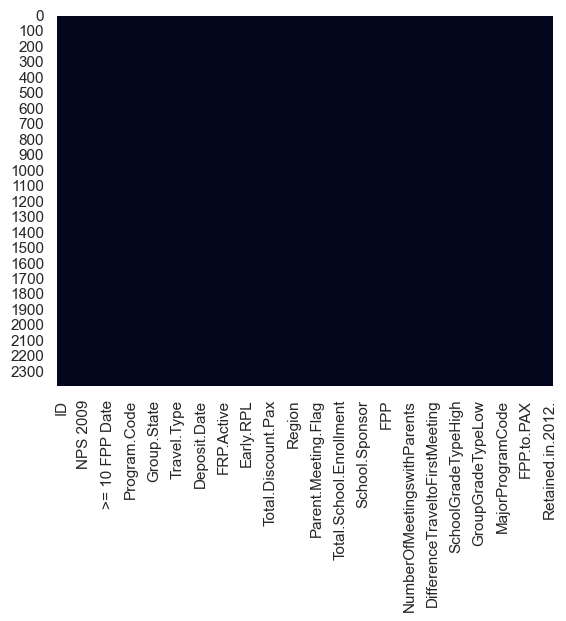

In [28]:
clean['NPS 2011'].fillna(clean['NPS 2011'].mode()[0], inplace=True)
clean['NPS 2010'].fillna(clean['NPS 2010'].mode()[0], inplace=True)
clean['NPS 2009'].fillna(clean['NPS 2009'].mode()[0], inplace=True)
clean['NPS 2008'].fillna(clean['NPS 2008'].mode()[0], inplace=True)
clean['>= 3 FPP Date'].fillna(clean['>= 3 FPP Date'].mode()[0], inplace=True)
clean['>= 10 FPP Date'].fillna(clean['>= 10 FPP Date'].mode()[0], inplace=True)
clean['>= 20 FPP Date'].fillna(clean['>= 20 FPP Date'].mode()[0], inplace=True)
clean['>= 35 FPP Date'].fillna(clean['>= 35 FPP Date'].mode()[0], inplace=True)
clean['From.Grade'].fillna(clean['From.Grade'].mode()[0], inplace=True)
clean['To.Grade'].fillna(clean['To.Grade'].mode()[0], inplace=True)
clean['Early.RPL'].fillna(clean['Early.RPL'].mode()[0], inplace=True)
clean['Latest.RPL'].fillna(clean['Latest.RPL'].mode()[0], inplace=True)
clean['CRM.Segment'].fillna(clean['CRM.Segment'].mode()[0], inplace=True)
clean['MDR.High.Grade'].fillna(clean['MDR.High.Grade'].mode()[0], inplace=True)
clean['Total.School.Enrollment'].fillna(clean['Total.School.Enrollment'].mean(), inplace=True)
clean['FirstMeeting'].fillna(clean['FirstMeeting'].mode()[0], inplace=True)
clean['DifferenceTraveltoFirstMeeting'].fillna(0, inplace=True)
clean['DifferenceTraveltoLastMeeting'].fillna(0, inplace=True)
clean['FPP.to.School.enrollment'].fillna(clean['FPP.to.School.enrollment'].mean(), inplace=True)
clean['Initial.System.Date'].fillna(clean['Initial.System.Date'].mode()[0], inplace=True)






sns.heatmap(clean.isnull(), cbar=False)
pd.set_option("display.max_columns", None)
clean.isnull().sum()

In [29]:
clean

ID  NPS 2011  NPS 2010  NPS 2009  NPS 2008  >= 3 FPP Date  \
0        1  0.560600  0.604575  0.568569  0.599267      -0.180578   
1        2 -0.381707  0.604575  0.568569  0.599267      -4.605143   
2        3  0.560600  0.604575  0.568569  0.599267      -0.179165   
3        4  0.560600  0.604575  0.568569  0.599267       4.295342   
4        5  0.560600  0.604575  0.568569  0.599267      -0.224395   
...    ...       ...       ...       ...       ...            ...   
2384  2385 -0.381707  0.604575 -0.387810 -0.336011       0.101640   
2385  2386  0.560600  0.604575  0.568569  0.599267      -0.173982   
2386  2387  0.560600  0.604575  0.568569  0.599267       4.393342   
2387  2389  0.560600 -0.526565 -1.344188  0.599267      -0.029810   
2388  2388 -4.150935  0.604575  0.568569  0.599267      -0.029339   

      >= 10 FPP Date  >= 20 FPP Date  >= 35 FPP Date  Program.Code  \
0          -0.288057       -0.295959       -0.386751            14   
1          -0.483036       -0.394179       -0.455806             5   
2          -0.291580       -0.224182       -0.455806             6   
3           3.426732       -0.370139       -0.455806            11   
4          -0.324860       -0.395553       -0.455806             6   
...              ...             ...             ...           ...   
2384       -0.055099       -0.159274        2.507508             5   
2385       -0.133796       -0.195678       -0.455806             6   
2386        3.508169        2.965918       -0.455806             6   
2387       -0.136928       -0.230364       -0.455806             6   
2388       -0.053533       -0.370139       -0.455806            14   

      From.Grade  To.Grade  Group.State  Is.Non.Annual.      Days  \
0      -2.354643 -2.511691            6       -0.426718 -2.496904   
1       0.527111  0.055905            4       -0.426718  1.693544   
2       0.527111  0.055905           10       -0.426718 -1.100088   
3       1.247550  2.623500           48        2.343469 -1.100088   
4      -0.913766  0.055905           10       -0.426718  0.995136   
...          ...       ...          ...             ...       ...   
2384   -0.193327  0.055905            6       -0.426718  0.296728   
2385    0.527111  0.055905            6       -0.426718  0.296728   
2386    1.967989  2.623500            6       -0.426718  0.995136   
2387    0.527111  0.055905           50       -0.426718  0.995136   
2388   -2.354643 -2.511691            6       -0.426718 -2.496904   

      Travel.Type  Departure.Date  Return.Date  Deposit.Date  Special.Pay  \
0               0       -3.195846    -3.255378     -0.287585            3   
1               0       -3.195846    -3.196538     -6.997683            0   
2               0       -3.187353    -3.230161     -0.159807            3   
3               1       -3.187353    -3.230161      6.119988            3   
4               3       -3.178860    -3.196538     -0.218516            3   
...           ...             ...          ...           ...          ...   
2384            0        1.169473     1.687164     -0.021668            3   
2385            0        1.177966     1.695570     -0.159807            1   
2386            0        1.177966     1.712381      6.127586            2   
2387            0        1.186459     1.712381     -0.150137            3   
2388            0        1.186459     1.081955     -0.020286            3   

       Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  \
0    -1.846961    0.480085      -0.083119             -0.636306   0.090478   
1     1.139266   -0.464468       1.548978             -0.701349  -8.609047   
2    -0.673246    0.007809       0.732929              0.595170   0.183931   
3    -1.921384   -0.995779      -0.899168             -2.474848   0.181128   
4    -1.163198    1.365603       1.276961             -0.332773   0.090478   
...        ...         ...            ...                   ...        ...   
2384  0.429146    0.066843       0.188

1    1451
0     938
Name: Retained.in.2012., dtype: int64

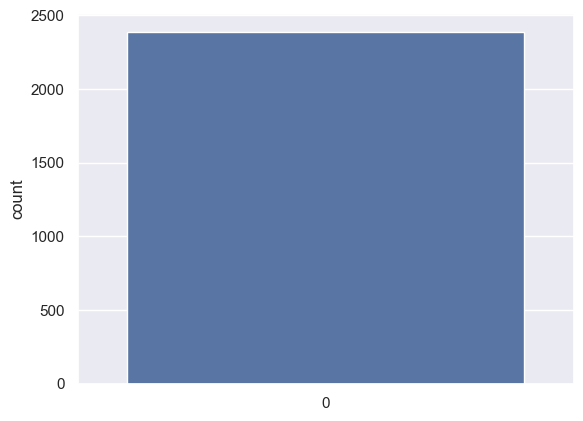

In [30]:
sns.countplot(clean['Retained.in.2012.'])
clean['Retained.in.2012.'].value_counts()

In [31]:
from sklearn.utils import resample
#Crear dos diferentes dataframe de una clase mayoritaria y minoritaria
df_majority = clean[(clean['Retained.in.2012.']==1)] 
df_minority = clean[(clean['Retained.in.2012.']==0)] 

# muestreo ascendente de la clase minoritaria
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # muesta con reemplazo 
                                 n_samples= 1451, # para que coincida con la clase mayoritaria
                                 random_state=0)   # resultados reproducible

# Combinar la clase mayoritaria con la muestra ascendente de la clase minoritaria 
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

0    1451
1    1451
Name: Retained.in.2012., dtype: int64

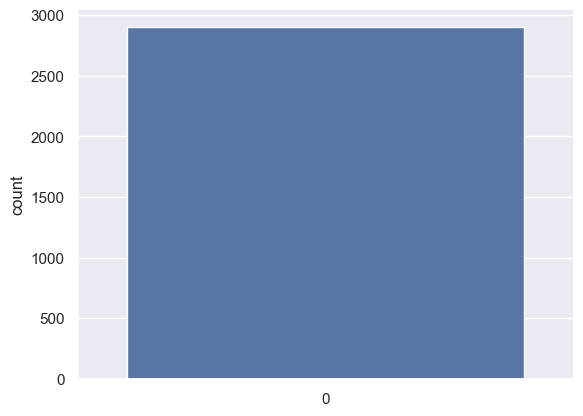

In [37]:
sns.countplot(df_upsampled['Retained.in.2012.'])
df_upsampled['Retained.in.2012.'].value_counts()

In [44]:
def remove_outliers_iqr(clean, columns):
    for col in columns:
        q1 = clean[col].quantile(0.25)
        q3 = clean[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        clean = clean[(clean[col] >= lower_bound) & (clean[col] <= upper_bound)]
    return clean

# Señale las columnas para remover los outliers
columns_to_check = ['DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting']

# Solicitar la función que remueve los outliers usando IQR
clean_clean = remove_outliers_iqr(df_upsampled, columns_to_check)

# Mostrar el resultado en el dataframe
clean_clean.head()

ID  NPS 2011  NPS 2010  NPS 2009  NPS 2008  >= 3 FPP Date  \
567    568 -0.381707  0.604575  0.568569  0.599267       0.061122   
2066  2067  0.560600  0.604575  0.568569  0.599267       0.061122   
1060  1061 -1.324014  0.604575  0.568569  0.599267       0.013064   
807    808  0.560600  0.604575  0.568569  0.599267      -0.274337   
2051  2052  0.560600  0.604575  0.568569  0.599267       4.389572   

      >= 10 FPP Date  >= 20 FPP Date  >= 35 FPP Date  Program.Code  \
567        -0.087596       -0.161335        2.478258             6   
2066       -0.294713       -0.370139       -0.455806             6   
1060       -0.128315       -0.224182        2.507207            14   
807        -0.294321       -0.158931       -0.455806             6   
2051       -0.294713       -0.370139       -0.455806             6   

      From.Grade  To.Grade  Group.State  Is.Non.Annual.      Days  \
567     1.967989  2.623500           20       -0.426718 -0.401680   
2066   -1.634205 -1.227893           46       -0.426718 -1.100088   
1060   -2.354643 -1.869792            6        2.343469 -2.496904   
807    -0.913766  0.055905           50        2.343469  0.995136   
2051    0.527111  0.055905           46       -0.426718  0.296728   

      Travel.Type  Departure.Date  Return.Date  Deposit.Date  Special.Pay  \
567             1       -0.715937    -0.767296     -0.025121            3   
2066            0        1.050574     0.964275     -0.087974            3   
1060            0        0.133347     0.039650     -0.094881            3   
807             0       -0.614023    -0.658022     -0.150137            3   
2051            0        1.042081     0.972681      6.253983            3   

       Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  \
567  -1.519809    0.125878      -0.355135             -0.306756   0.181128   
2066 -0.242213   -0.700606      -0.899168              1.861335   0.181128   
1060 -1.857814    0.007809      -0.627151             -0.631970   0.181128   
807   0.898942   -0.936744      -0.627151             -2.275384   0.181128   
2051  0.235336   -0.936744      -0.899168             -1.607611   0.181128   

      Latest.RPL  Cancelled.Pax  Total.Discount.Pax  Initial.System.Date  \
567     0.250221       0.041318            0.363883             0.484277   
2066    0.160133      -0.817011           -0.679297             0.421758   
1060    0.082290       0.041318           -0.679297             0.369458   
807    -8.505827      -0.602429            0.016156            -5.649857   
2051    0.000948      -0.817011           -1.027024             5.899436   

      Poverty.Code  Region  CRM.Segment  School.Type  Parent.Meeting.Flag  \
567              2       3    -1.792580            2             0.405253   
2066             2       0    -1.063939            2             0.405253   
1060             6       5    -1.063939            3             0.405253   
807              3       4     1.121986            2             0.405253   
2051             6       1     0.029023            2            -2.467594   

      MDR.Low.Grade  MDR.High.Grade  Total.School.Enrollment  Income.Level  \
567               8        2.066453             3.521640e+00             6   
2066             11       -1.370068            -7.375063e-02            13   
1060             11       -1.370068            -1.368577e+00            20   
807               7        2.066453            -8.875722e-01             5   
2051             12       -0.224561            -5.256408e-17            22   

      EZ.Pay.Take.Up.Rate  School.Sponsor  SPR.Product.Type  SPR.New.Existing  \
567             -0.661494       -0.344159                 2                 1   
2066             1.234131       -0.344159                 2                 1   
1060            -0.693623        2.905630                 0                 1   
807             -0.462293       -0.344159                 2                 0   
2051            -1.336208      

In [45]:
clean_clean.shape

(2485, 64)

<AxesSubplot: >

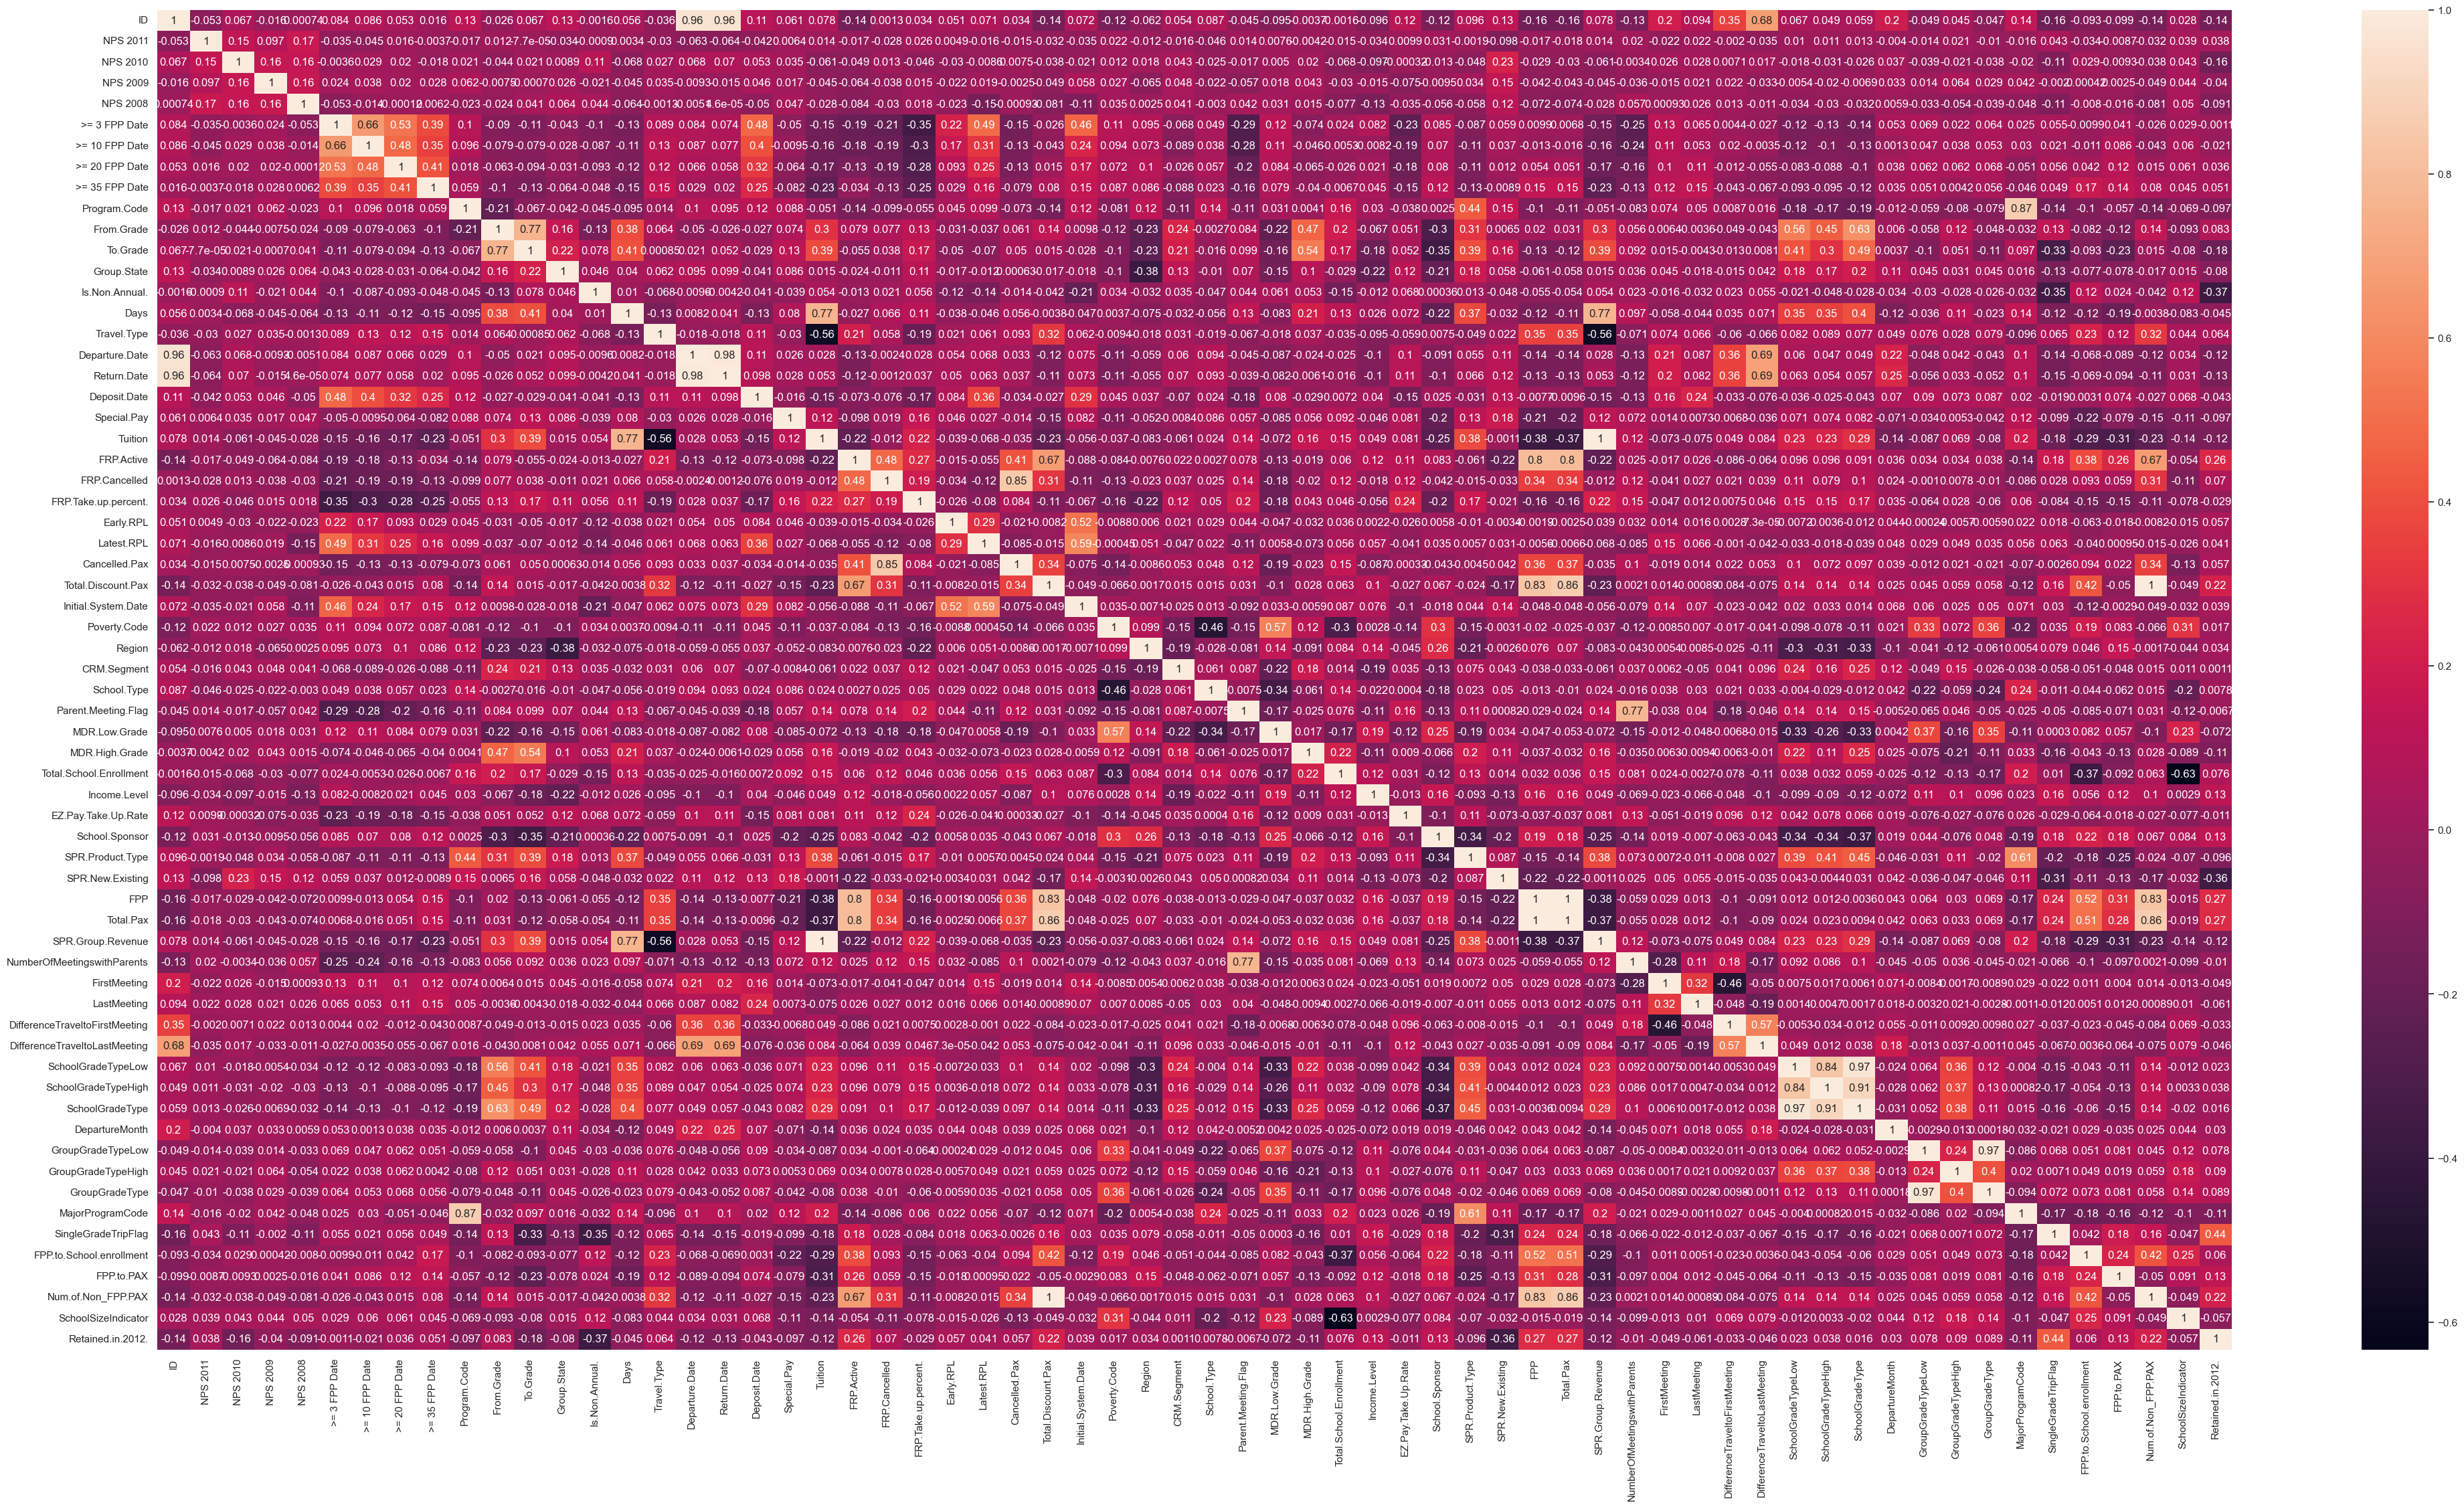

In [48]:
plt.figure(figsize=(50, 26))
sns.heatmap(clean_clean.corr(), fmt='.2g', annot=True)

In [49]:
X = clean_clean.drop('Retained.in.2012.', axis=1)
y = clean_clean['Retained.in.2012.']

LOGISTIC REGRESSION

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [51]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [52]:
y_pred = LR.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 74.65 %


GAUSSIAN_NB

In [53]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [54]:
y_pred = gnb.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.77
Precisión en el set de Test: 0.73


In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.7303822937625754
Precision Score :  0.7303822937625755
Recall Score :  0.7303822937625755
Jaccard Score :  0.5752773375594294


<Figure size 900x900 with 0 Axes>

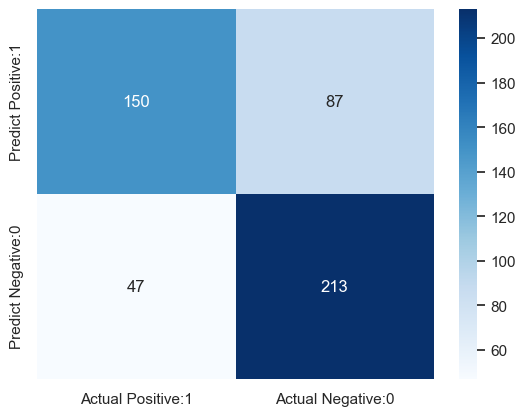

<Figure size 900x900 with 0 Axes>

In [56]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

SVM Model

In [61]:
from sklearn.svm import SVC
svc = SVC(C=1, gamma=1) 
svc.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [64]:
y_pred = svc.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(svc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(svc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.98
Precisión en el set de Test: 0.84


In [65]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.8350100603621731
Precision Score :  0.8350100603621731
Recall Score :  0.8350100603621731
Jaccard Score :  0.7167530224525043


<Figure size 900x900 with 0 Axes>

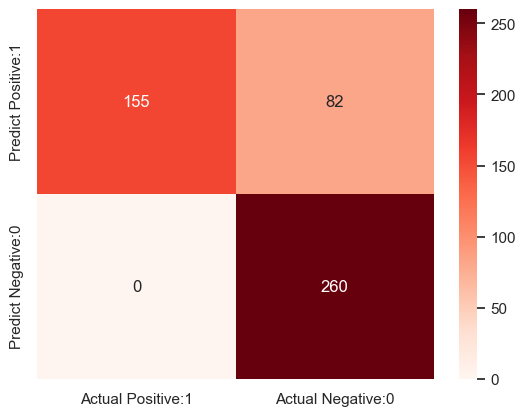

<Figure size 900x900 with 0 Axes>

In [66]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

Modelo SVM usando Linear Kernel function

In [67]:
linear_classifier = SVC(kernel='linear').fit(X_train,y_train)
y_pred = linear_classifier.predict(X_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with linear kernel : 0.732


<AxesSubplot: >

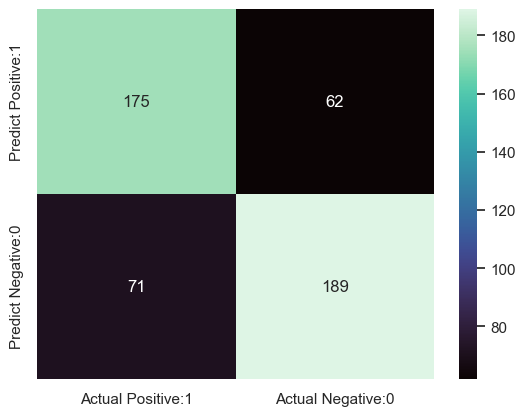

In [68]:
# Matriz de confusión para SVM Linear Kernel
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

Modelo SVM usando la función kernel Gaussian RBF

In [69]:
rbf_svc=SVC(kernel='rbf').fit(X_train,y_train)
y_pred = rbf_svc.predict(X_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.581


<AxesSubplot: >

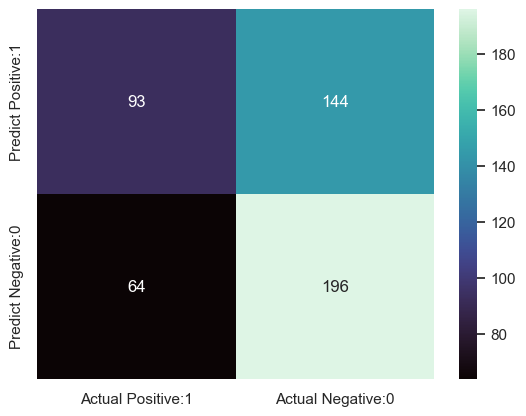

In [70]:
# Matriz de confusión Gaussian RBF
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Modelo SVM usando la función kernel Polynomial

In [71]:
Poly_svc=SVC(kernel='poly', C=1).fit(X_train,y_train)
y_pred = Poly_svc.predict(X_test)
print('Model accuracy with poly kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with poly kernel : 0.569


<AxesSubplot: >

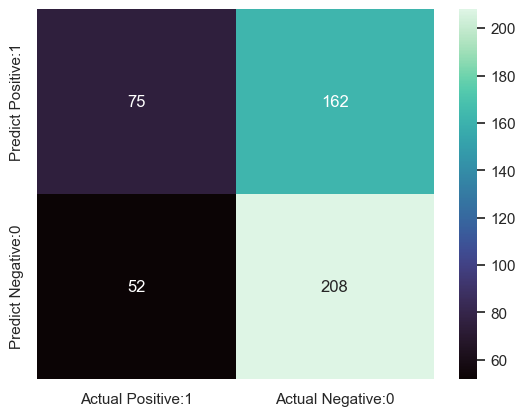

In [72]:
# Matriz de confusión Polynomial
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

Modelo SVM usando la función kernel Sigmoid

In [73]:
Sig_svc=SVC(kernel='sigmoid', C=1).fit(X_train,y_train)
y_pred = Sig_svc.predict(X_test)
print('Model accuracy with sigmoid kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with sigmoid kernel : 0.449


<AxesSubplot: >

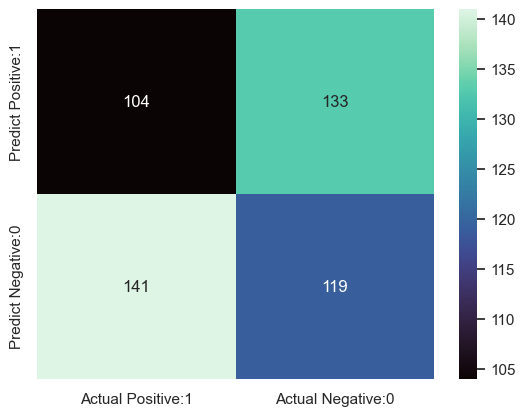

In [74]:
# Matriz de confusión Sigmoid
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [76]:
#Hacemos predicción con CLF Gini
y_pred_gini = clf_gini.predict(X_test)

In [77]:
#Estimamos precisión 
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_gini.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_gini.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.79
Precisión en el set de Test: 0.76


In [78]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred_gini, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_gini, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_gini, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_gini, average='micro')))

F-1 Score :  0.7645875251509054
Precision Score :  0.7645875251509054
Recall Score :  0.7645875251509054
Jaccard Score :  0.6188925081433225


<Figure size 900x900 with 0 Axes>

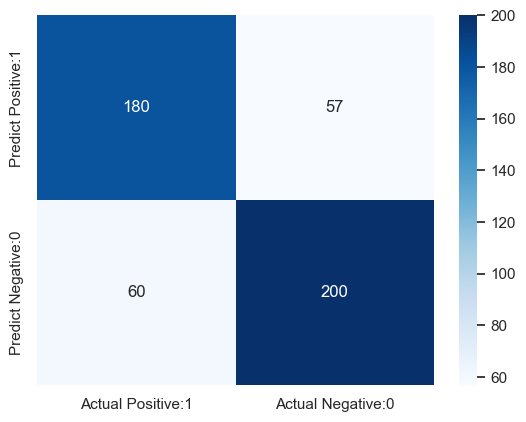

<Figure size 900x900 with 0 Axes>

In [79]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

[Text(0.5, 0.875, 'x[58] <= -0.114\ngini = 0.499\nsamples = 1988\nvalue = [947, 1041]'),
 Text(0.25, 0.625, 'x[13] <= 0.958\ngini = 0.41\nsamples = 926\nvalue = [659, 267]'),
 Text(0.125, 0.375, 'x[41] <= 0.5\ngini = 0.469\nsamples = 639\nvalue = [399, 240]'),
 Text(0.0625, 0.125, 'gini = 0.466\nsamples = 263\nvalue = [97, 166]'),
 Text(0.1875, 0.125, 'gini = 0.316\nsamples = 376\nvalue = [302, 74]'),
 Text(0.375, 0.375, 'x[36] <= 2.085\ngini = 0.17\nsamples = 287\nvalue = [260, 27]'),
 Text(0.3125, 0.125, 'gini = 0.145\nsamples = 279\nvalue = [257, 22]'),
 Text(0.4375, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.75, 0.625, 'x[43] <= -0.562\ngini = 0.395\nsamples = 1062\nvalue = [288, 774]'),
 Text(0.625, 0.375, 'x[0] <= 299.0\ngini = 0.492\nsamples = 269\nvalue = [152, 117]'),
 Text(0.5625, 0.125, 'gini = 0.366\nsamples = 29\nvalue = [7, 22]'),
 Text(0.6875, 0.125, 'gini = 0.478\nsamples = 240\nvalue = [145, 95]'),
 Text(0.875, 0.375, 'x[13] <= 0.958\ngini = 0.284\nsa

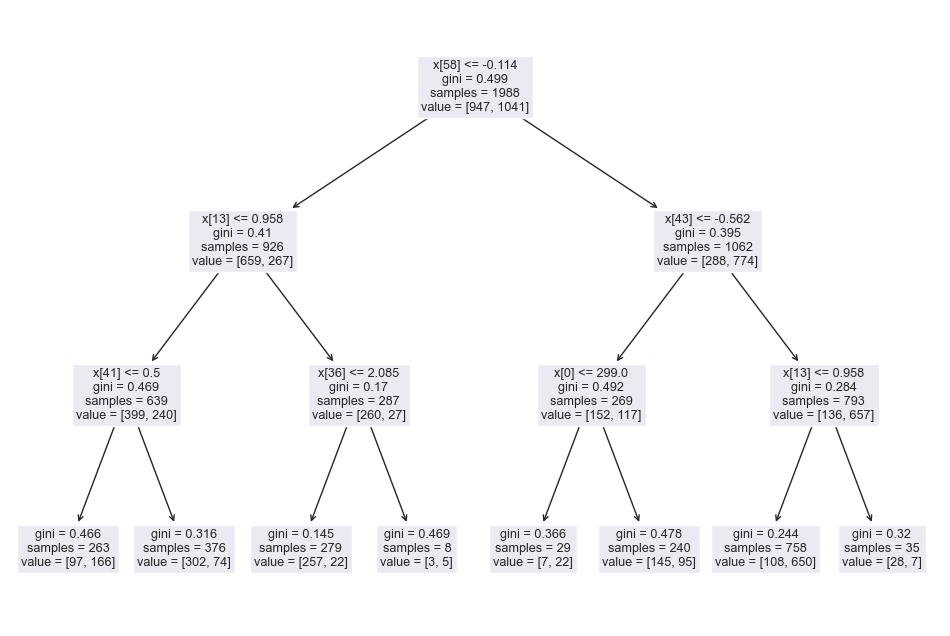

In [80]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

Decision Tree gini entropy

In [81]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [82]:
#Hacemos predicciones
y_pred_en = clf_en.predict(X_test)

In [83]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_en.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_en.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.79
Precisión en el set de Test: 0.76


<Figure size 900x900 with 0 Axes>

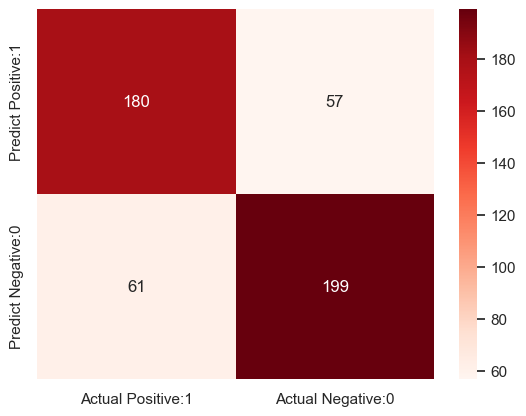

<Figure size 900x900 with 0 Axes>

In [84]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

[Text(0.5, 0.875, 'x[58] <= -0.114\nentropy = 0.998\nsamples = 1988\nvalue = [947, 1041]'),
 Text(0.25, 0.625, 'x[13] <= 0.958\nentropy = 0.867\nsamples = 926\nvalue = [659, 267]'),
 Text(0.125, 0.375, 'x[41] <= 0.5\nentropy = 0.955\nsamples = 639\nvalue = [399, 240]'),
 Text(0.0625, 0.125, 'entropy = 0.95\nsamples = 263\nvalue = [97, 166]'),
 Text(0.1875, 0.125, 'entropy = 0.715\nsamples = 376\nvalue = [302, 74]'),
 Text(0.375, 0.375, 'x[9] <= 6.5\nentropy = 0.45\nsamples = 287\nvalue = [260, 27]'),
 Text(0.3125, 0.125, 'entropy = 0.311\nsamples = 233\nvalue = [220, 13]'),
 Text(0.4375, 0.125, 'entropy = 0.826\nsamples = 54\nvalue = [40, 14]'),
 Text(0.75, 0.625, 'x[43] <= -0.562\nentropy = 0.843\nsamples = 1062\nvalue = [288, 774]'),
 Text(0.625, 0.375, 'x[0] <= 299.0\nentropy = 0.988\nsamples = 269\nvalue = [152, 117]'),
 Text(0.5625, 0.125, 'entropy = 0.797\nsamples = 29\nvalue = [7, 22]'),
 Text(0.6875, 0.125, 'entropy = 0.968\nsamples = 240\nvalue = [145, 95]'),
 Text(0.875, 0.37

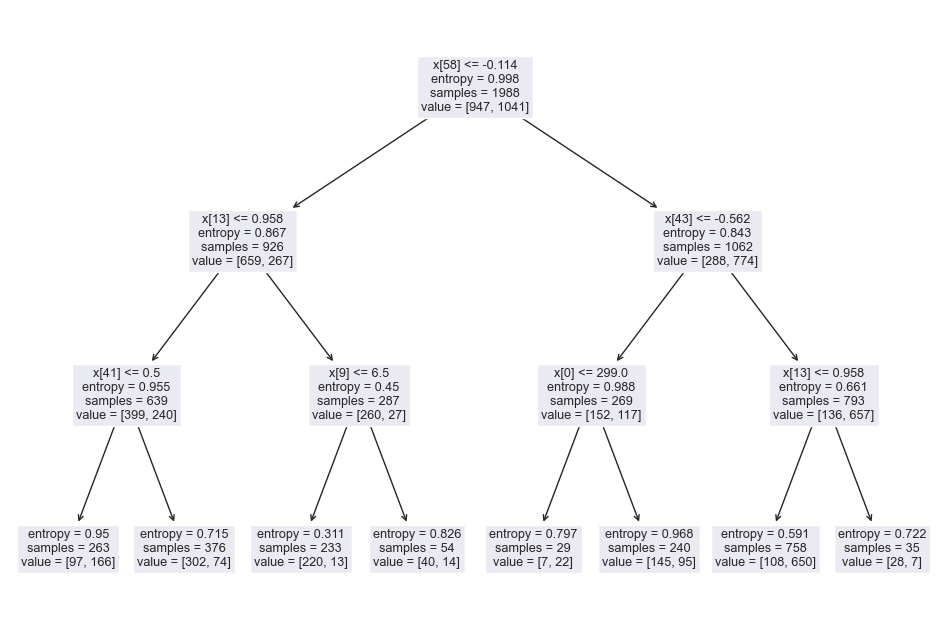

In [85]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

KNN Model


In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto',metric='euclidean',weights='uniform')

#Recuerden: Si quiseramos seleccionar una métrica particular para calcular las distancias incluiriamos todo lo que se observa  más alla de señalar el número de K. En caso contrario dejamos el scrit hasta el tamaño de K. 

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [87]:
y_pred = knn.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(knn.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.85
Precisión en el set de Test: 0.71


In [88]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.7062374245472837
Precision Score :  0.7062374245472837
Recall Score :  0.7062374245472837
Jaccard Score :  0.5458786936236392


<Figure size 900x900 with 0 Axes>

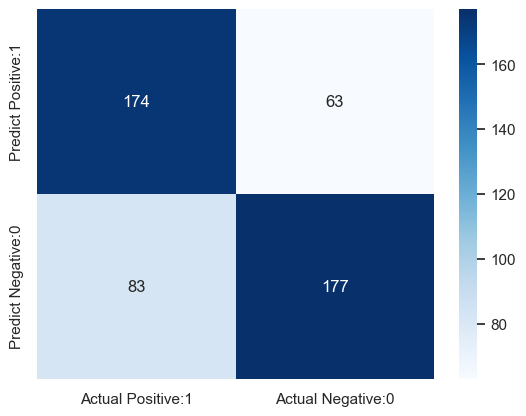

<Figure size 900x900 with 0 Axes>

In [89]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [91]:
# sacar las probabilidades
from sklearn.metrics import roc_curve
y_pred_prob = knn.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

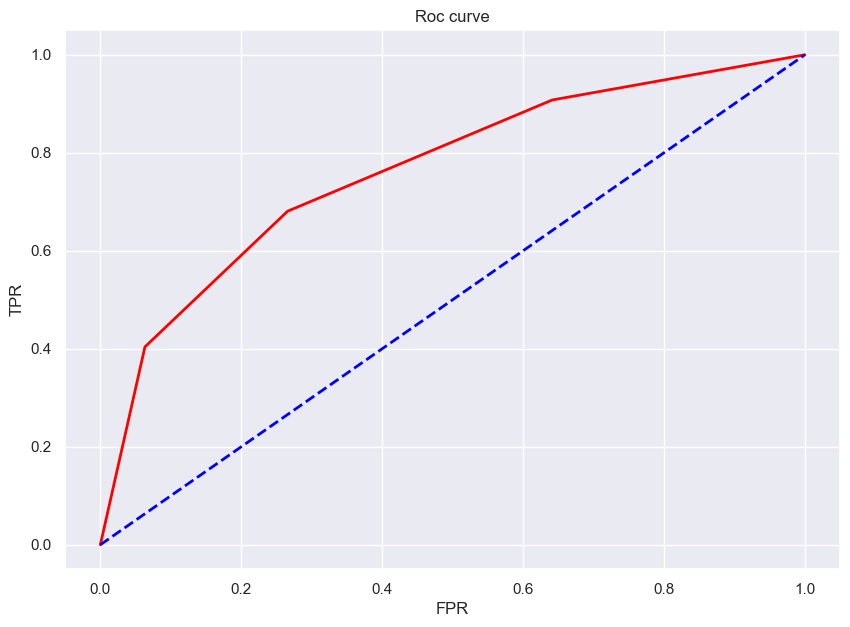

In [92]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Random Forrest


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [94]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [97]:
#Hacemos predicción con CLF Gini
y_pred_gini = clf_gini.predict(X_test)

In [98]:
#Estimamos precisión 
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_gini.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_gini.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.79
Precisión en el set de Test: 0.76
